# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
from dis import disco

# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
import plotly.figure_factory as ff
import plotly.express as px
from mpmath.libmp import normalize

%matplotlib inline

Прочитаем исходные данные:

In [3]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

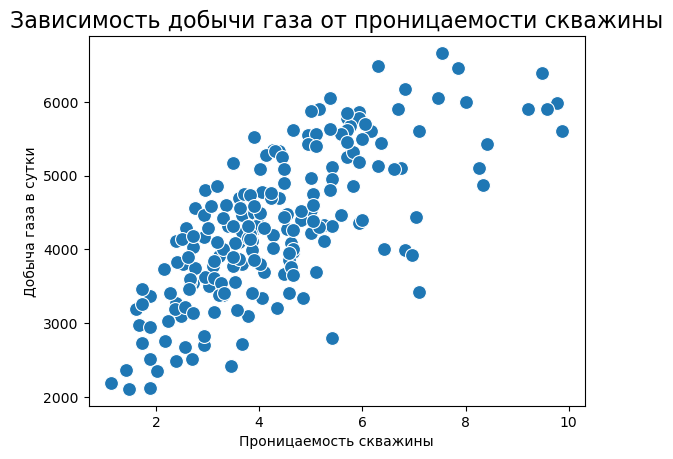

In [5]:
scatterplot = sns.scatterplot(
    data=data,
    x='Perm',
    y='Prod',
    s=100

)
scatterplot.set_title('Зависимость добычи газа от проницаемости скважины', fontsize=16)
scatterplot.set_xlabel('Проницаемость скважины')
scatterplot.set_ylabel('Добыча газа в сутки');

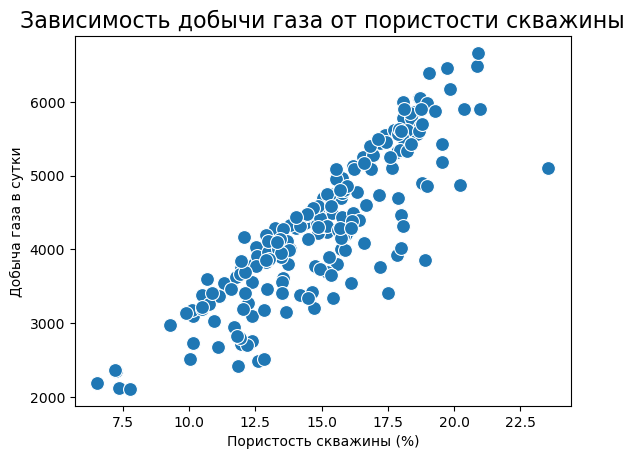

In [7]:
scatterplot = sns.scatterplot(
    data=data,
    x='Por',
    y='Prod',
    s=100

)
scatterplot.set_title('Зависимость добычи газа от пористости скважины', fontsize=16)
scatterplot.set_xlabel('Пористость скважины (%)')
scatterplot.set_ylabel('Добыча газа в сутки');

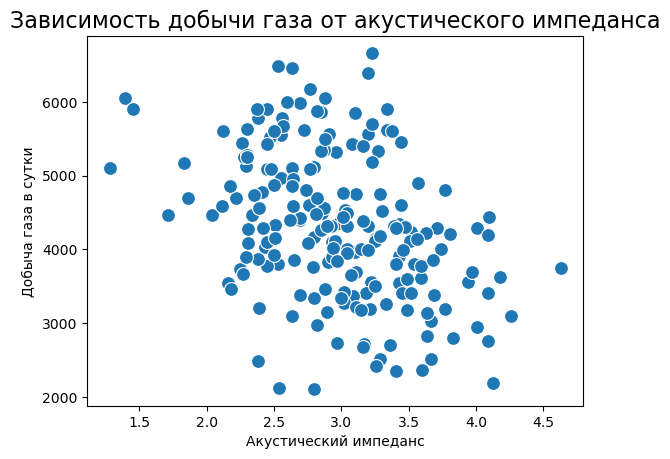

In [24]:
scatterplot = sns.scatterplot(
    data=data,
    x='AI',
    y='Prod',
    s=100

)
scatterplot.set_title('Зависимость добычи газа от акустического импеданса', fontsize=16)
scatterplot.set_xlabel('Акустический импеданс')
scatterplot.set_ylabel('Добыча газа в сутки');

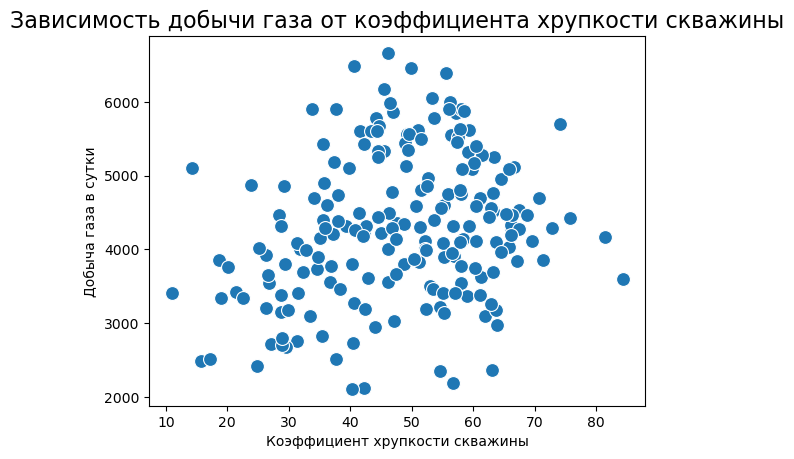

In [9]:
scatterplot = sns.scatterplot(
    data=data,
    x='Brittle',
    y='Prod',
    s=100

)
scatterplot.set_title('Зависимость добычи газа от коэффициента хрупкости скважины', fontsize=16)
scatterplot.set_xlabel('Коэффициент хрупкости скважины')
scatterplot.set_ylabel('Добыча газа в сутки');

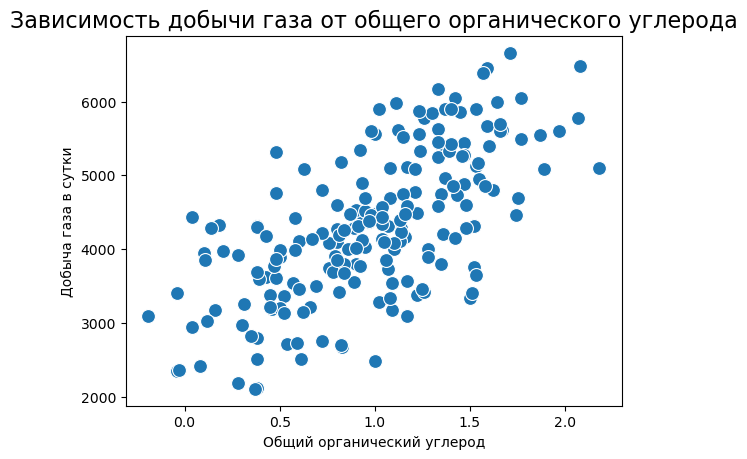

In [11]:
scatterplot = sns.scatterplot(
    data=data,
    x='TOC',
    y='Prod',
    s=100

)
scatterplot.set_title('Зависимость добычи газа от общего органического углерода', fontsize=16)
scatterplot.set_xlabel('Общий органический углерод')
scatterplot.set_ylabel('Добыча газа в сутки');

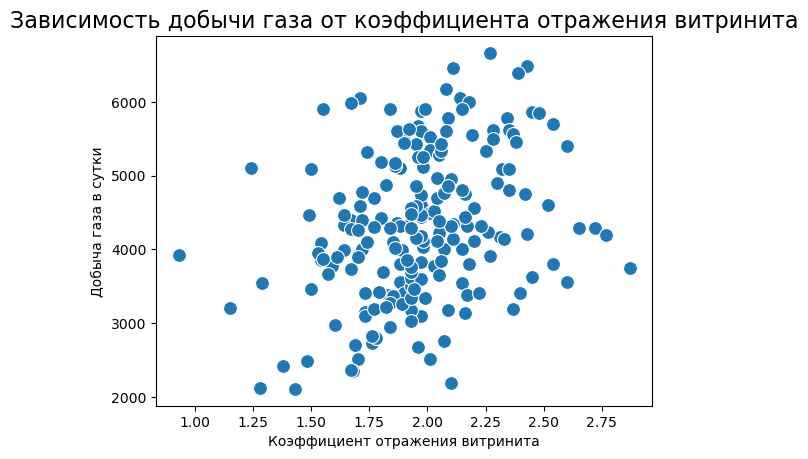

In [13]:
scatterplot = sns.scatterplot(
    data=data,
    x='VR',
    y='Prod',
    s=100

)
scatterplot.set_title('Зависимость добычи газа от коэффициента отражения витринита', fontsize=16)
scatterplot.set_xlabel('Коэффициент отражения витринита')
scatterplot.set_ylabel('Добыча газа в сутки');

Исходя из построенных данных можно наблюдать прямую зависимость добычи газа от пористости и проницаемости скважины, а также видно отсутствие зависимости добычи газа от акустического импеданса, коэффициента хрупкости скважины, общего органического углерода и коэффициента отражения витринита.

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Ранг корреляционной матрицы = 8
Определитель корреляционной матрицы = 0.0007299388072652082


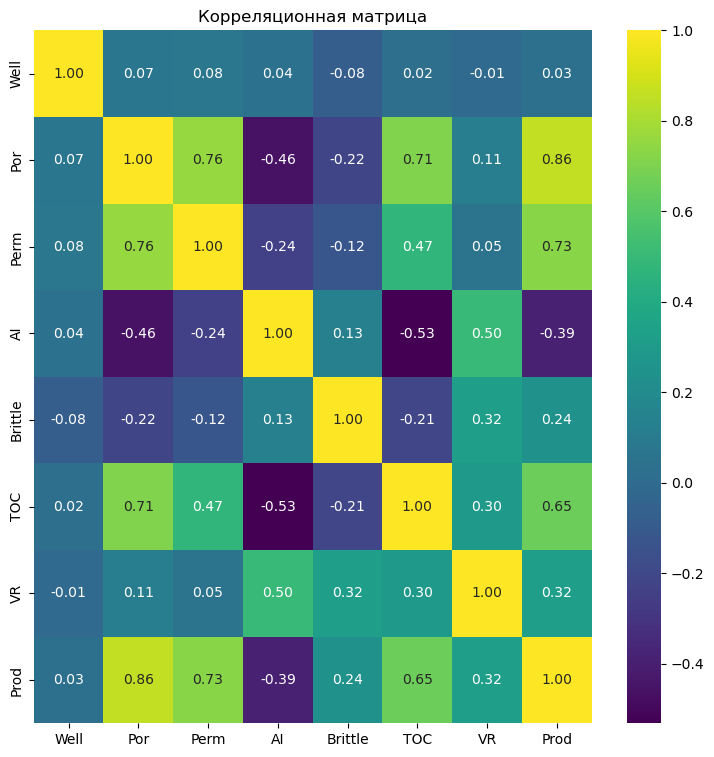

In [37]:
# корреляционная матрица
corr_matrix = data.corr()
# расчет определителя корреляционной матрицы
det = np.linalg.det(corr_matrix)
# расчет ранга корреляционной матрицы
rank = np.linalg.matrix_rank(corr_matrix)
# вывод на экран значений ранга и определителя
print(f'Ранг корреляционной матрицы = {rank}')
print(f'Определитель корреляционной матрицы = {det}')
# построим тепловую карту
plt.figure(figsize=(9, 9))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis') 
plt.title('Корреляционная матрица')
plt.show()

1)Сильнее всего с целевой переменной коррелируют факторы Por (0.8619095), Perm (0.7274261) и TOC (0.6544452).
2)Определитель корреляционной матрицы близок к нулу (0.0007299), следовательно, корреляционная матрица плохо обусловлена.
3)Ранг корреляционной матрицы равен ее размеру, нет абсолютно взаимосвязанных между собой факторов, однако определитель близок к нулю и есть связанные факторы между собой, что подтверждает, что есть мультиколлинеарность. 
4)Модель классической линейной регрессии по методу наименьших квадратов можно применить, но необходимо очистить данные от лишних факторов.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [38]:
# матрица наблюдений Х
x = np.column_stack((np.ones(data.shape[0]),data[['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']]))
# вектор правильных ответов Y
y = data[['Prod']]
# матричной формулой МНК для построения модели линейной регрессии
lin_reg = np.linalg.inv(x.T@x)@x.T@y
# вывод полученных оценок коэффициентов модели, округлённых до целого
print(np.round(lin_reg.values, 0))

[[-1232.]
 [    0.]
 [  230.]
 [  116.]
 [ -365.]
 [   25.]
 [  -78.]
 [  785.]]


1)Неинформативный (шумовой признак) исходя из полученных результатов - Well, оценка его влияния около 0. Данный показатель является идентификатором скважины, логично, что он не оказывает никакого влияния на целевую переменную.
2)Исходя из полученных оценок: при увеличении пористости скважины на 1% добыча газа вырастет на 230 млн. куб. футов в сутки; при увеличении проницаемости скважины на 1% добыча газа вырастет на 116 млн. куб. футов в сутки; при увеличении коэффициента хрупкости скважины на 1 % добыча газа снизится на 365 млн. куб. футов в сутки.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [44]:
# задание а)
data2 = {
    'w0': 1,
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
}
data2 = np.array(list(data2.values()))
# прогноз по заданным параметрам
predict_prod = (data2@lin_reg).iloc[0]
prod = 4748.315024
print(f'Абсолютная ошибка прогноза = {abs(prod - predict_prod)}')

# задание б)
# прогноз выработки газа для всех скважин из обучающего набора данных
pred = x@lin_reg
# рассчитаем метрики - среднее отклонение и среднее квадратическое отклонение реальных данных от прогнозных
avg_dev = (np.abs(data['Prod'] - pred['Prod'])).sum() / data.shape[0]
avg_sq_dev = ((data['Prod'] - pred['Prod']) ** 2).sum() / data.shape[0]
print(f'Среднее отклонение реальных данных от прогнозных = {avg_dev}')
print(f'Среднее квадратическое отклонение реальных данных от прогнозных = {avg_sq_dev}')

Абсолютная ошибка прогноза = 25.250970292806414
Среднее отклонение реальных данных от прогнозных = 153.62297086558314
Среднее квадратическое отклонение реальных данных от прогнозных = 39315.04014026637


а) Абсолютная ошибка прогноза для скважины - 25.2509, относительно небольшая величина.
б) Получившиеся расчеты среднего отклонения и среднеквадратичного отклонение показали достаточно большие результаты, что свидетельствует о недостаточном качестве построенной регрессионной модели.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [48]:
# выводим на экран корреляцию параметров с целевым признаком, а также полученные оценки коэффициентов
display(corr_matrix.loc['Prod'])
print(np.round(lin_reg, 0))

Well       0.026817
Por        0.861910
Perm       0.727426
AI        -0.390835
Brittle    0.237155
TOC        0.654445
VR         0.323182
Prod       1.000000
Name: Prod, dtype: float64

     Prod
0 -1232.0
1     0.0
2   230.0
3   116.0
4  -365.0
5    25.0
6   -78.0
7   785.0


Из общей картины выбивается параметр TOC — общий органический углерод. У него достаточно высокая корреляция с целевым признаком (0.654445), но также по данному параметру мы наблюдаем отрицательный коэффициент (-78.0). Возможно присутствуют некие искажающие результат факторы, либо есть ошибки в модели.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [58]:
# исключаем сильно коррелированные данные
data3 = data.drop(['Perm', 'Well'], axis=1)
x_clean = np.column_stack((np.ones(data3.shape[0]), data3[['Por', 'AI', 'Brittle', 'TOC', 'VR']]))
y_clean = data3[['Prod']]
lin_reg_clean = np.linalg.inv(x_clean.T@x_clean)@x_clean.T@y_clean
print(np.round(lin_reg_clean.values, 0))
# корректировки для обучающего набора данных
pred_clean = x_clean@lin_reg_clean
avg_dev_clean = (np.abs(data3['Prod'] - pred_clean['Prod'])).sum() / data3.shape[0]
avg_sq_dev_clean = ((data3['Prod'] - pred_clean['Prod']) ** 2).sum() / data3.shape[0]
print(f'Среднее отклонение очищенных реальных данных от прогнозных = {avg_dev_clean}')
print(f'Среднее квадратическое отклонение очищенных реальных данных от прогнозных = {avg_sq_dev_clean}')

[[-1889.]
 [  290.]
 [ -140.]
 [   29.]
 [   89.]
 [  407.]]
Среднее отклонение очищенных реальных данных от прогнозных = 170.36541690392303
Среднее квадратическое отклонение очищенных реальных данных от прогнозных = 53393.67973621555


1)Из полученных скорректированных данных можно провести следующие наблюдения - при увеличении параметра пористость скважины Por на 1% добыча газа вырастает на 290 млн. куб. футов в сутки (значение до корректировки 230 млн. куб. футов в сутки - из чего можно сделать вывод, что влияние данного фактора на результат выросло); при увеличении параметра акустический импеданс AI на 1% добыча газа снизится на 140 млн. куб. футов в сутки (значение до корректировки - (-365) млн. куб. футов в сутки - из чего можно сделать вывод, что влияние данного фактора на результат снизилось); при увеличении параметра общий органический углерод TOC на 1% добыча газа вырастает на 89 млн. куб. футов в сутки (значение до корректировки - (-78) - коэффициент поменял знак на противоположный и теперь соответствует логике связи по матрице корреляции.
2)Стоит отметить, что тклонение прогноза от факта осталось на высоком уровне, более того, даже увеличилось - модель по-прежнему показывает большую ошибку. Однако путем корректировки удалось преодолеть  разнонаправленность корреляций и коэффициентоь.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [60]:
from sklearn.linear_model import LinearRegression
# модель линейной регрессии c помощью библиотеки
lin_r = LinearRegression(fit_intercept=False)
# коэффициенты регрессии
lin_r.fit(x_clean, y_clean)
print('Коэффициенты регрессии, посчитанные c момощью библиотеки sklearn:', np.round(lin_r.coef_))
# прогноз для всех данных
new_pred_lin_r = lin_r.predict(x_clean)
df_pred_lin_r = pd.DataFrame(new_pred_lin_r)
# метрики
lin_r_avg_dev = (np.abs(data3['Prod'] - df_pred_lin_r[0])).sum() / data3.shape[0]
lin_r_avg_sq_dev = ((data3['Prod'] - df_pred_lin_r[0]) ** 2).sum() / data3.shape[0]
print(f'Среднее отклонение, посчитанное библиотекой sklearn = {lin_r_avg_dev}')
print(f'Среднее квадратическое отклонение, посчитанное библиотекой sklearn = {lin_r_avg_sq_dev}')

Коэффициенты регрессии, посчитанные c момощью библиотеки sklearn: [[-1889.   290.  -140.    29.    89.   407.]]
Среднее отклонение, посчитанное библиотекой sklearn = 170.36541690392488
Среднее квадратическое отклонение, посчитанное библиотекой sklearn = 53393.67973621556


Метрики и коэффициенты получились аналогичные тем, которые были получены ранее.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [62]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [72]:
X = data3[['Por', 'AI', 'Brittle', 'TOC', 'VR']]
y = data3['Prod']
scaler = StandardScaler()
# стандартизация признаков
X_scaled = scaler.fit_transform(X)
poly = PolynomialFeatures(degree=3, include_bias=False)
# добавление полиномиальных признаков
X_poly = poly.fit_transform(X_scaled)
print(f'Количество факторов после генерации полиномиальных признаков = {X_poly.shape[1]}')
# модель линейной регрессии с обучением
lr_poly = LinearRegression(fit_intercept=True)
# кросс-валидация по двум метрикам
lr_poly_mae = cross_validate(lr_poly, X_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
lr_poly_mse = cross_validate(lr_poly, X_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.2f}'.format(-lr_poly_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-lr_poly_mae['test_score'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-lr_poly_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-lr_poly_mse['test_score'].mean()))

Количество факторов после генерации полиномиальных признаков = 55
MAE на тренировочных фолдах: 61.91
MAE на валидационных фолдах: 116.97
MSE на тренировочных фолдах: 6809.78
MSE на валидационных фолдах: 24965.78


1)Наблюдается значительное снижение обеих метрик по сравнению с расчетами модели обычной линейной регрессии. Качество модели улучшилось. Модель переучилась, так как есть сильная разница между тренировочными и валидационными фолдами.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [82]:
# создание словаря, содержащего потенциальные значения альфа
alpha_values = {'alpha': [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]}
lasso_gs = GridSearchCV(Lasso(fit_intercept=True, max_iter=10000),
                     alpha_values,
                     scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
                     refit='neg_mean_absolute_error',
                     cv=5)
# лучшие найденные гиперпараметры
best_params_lasso = lasso_gs.fit(X_poly, y).best_params_
alpha_lasso = best_params_lasso['alpha']
print('Лучшее значение alpha =', alpha_lasso)
# модель
lasso = Lasso(alpha=alpha_lasso, fit_intercept=True)
# кросс-валидация по двум метрикам
lasso_mae = cross_validate(lasso, X_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
lasso_mse = cross_validate(lasso, X_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.2f}'.format(-lasso_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-lasso_mae['test_score'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-lasso_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-lasso_mse['test_score'].mean()))

Лучшее значение alpha = 4
MAE на тренировочных фолдах: 71.32
MAE на валидационных фолдах: 88.98
MSE на тренировочных фолдах: 9349.06
MSE на валидационных фолдах: 14651.15


Качество модели повысилось. Снизилось значение метрик ошибок на валидационных фолдах по сравнению со значениями полиномиальной регресии. Также видно снижение переобученности модели, так как разница значений метрик на тренировочных и валидационных фолдах также снизилась.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [84]:
ridge_gs = GridSearchCV(Ridge(fit_intercept=True),
                        alpha_values,
                        scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
                        refit='neg_mean_absolute_error',
                        cv=5)
# лучшие найденные гиперпараметры
best_params_ridge = ridge_gs.fit(X_poly, y).best_params_
alpha_ridge = best_params_ridge['alpha']
print('Лучшее значение alpha =', alpha_ridge)
# модель
ridge = Ridge(alpha=alpha_ridge, fit_intercept=True)
# кросс-валидация по двум метрикам
ridge_mae = cross_validate(ridge, X_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
ridge_mse = cross_validate(ridge, X_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.2f}'.format(-ridge_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-ridge_mae['test_score'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-ridge_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-ridge_mse['test_score'].mean()))

Лучшее значение alpha = 1
MAE на тренировочных фолдах: 65.19
MAE на валидационных фолдах: 105.37
MSE на тренировочных фолдах: 7648.93
MSE на валидационных фолдах: 19414.05


По сравнению с показателями полиноминальной регрессии можно сказать, что модель улучшилась, однако по сравнению с результатами использования L1 регуляризации показатели хуже как в части значений метрик, так и по разнице между значениями тренировочных и валидационных фолдов.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [86]:
import warnings
warnings.filterwarnings('ignore')
grid_values = {
    'alpha': [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}
en_gs = GridSearchCV(ElasticNet(fit_intercept=True, max_iter=10000),
                        grid_values,
                        scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
                        refit='neg_mean_absolute_error',
                        cv=5)
# лучшие найденные гиперпараметры
best_params_en = en_gs.fit(X_poly, y).best_params_
alpha_en = best_params_en['alpha']
l1_ratio_en = best_params_en['l1_ratio']
print(f'Лучшее значение alpha: {alpha_en}, l1_ratio: {l1_ratio_en}')
# модель
en = ElasticNet(alpha=alpha_en, l1_ratio=l1_ratio_en, fit_intercept=True)
# кросс-валидация по двум метрикам
en_mae = cross_validate(en, X_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
en_mse = cross_validate(en, X_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.2f}'.format(-en_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-en_mae['test_score'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-en_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-en_mse['test_score'].mean()))

Лучшее значение alpha: 0.1, l1_ratio: 0.9
MAE на тренировочных фолдах: 68.26
MAE на валидационных фолдах: 106.35
MSE на тренировочных фолдах: 8351.25
MSE на валидационных фолдах: 19604.80


Результаты на валидационных фолдах получились хуже, чем полученные в предыдущих двух расчетах. Большая разница между тренировочными и валидационными фолдами говорит о переобучении модели. Параметр l1_ratio принял максимальное значение, что свидетельствует о том, что модель стремится к L1 регуляризации.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [94]:
# кросс-валидациz модели линейной регрессии без полиномиальных признаков
lr_mae = cross_validate(lin_r, x_clean, y_clean, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
lr_mse = cross_validate(lin_r, x_clean, y_clean, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
print('MAE на тренировочных фолдах: {:.2f}'.format(-lr_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-lr_mae['test_score'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-lr_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-lr_mse['test_score'].mean()))

MAE на тренировочных фолдах: 169.63
MAE на валидационных фолдах: 179.87
MSE на тренировочных фолдах: 52763.70
MSE на валидационных фолдах: 59199.52


In [98]:
# справочник из данных по моделям
dict = {
    'Модель': ['Lineal', 'Polynomial', 'Lasso', 'Ridge', 'ElasticNet'],
    'Гиперпараметры': [np.nan, np.nan, best_params_lasso, best_params_ridge, best_params_en],
    'Полиномиальные признаки': [False, True, True, True, True],
    'MAE train': [-lr_mae['train_score'].mean(),-lr_poly_mae['train_score'].mean(),-lasso_mae['train_score'].mean(),-ridge_mae['train_score'].mean(),-en_mae['train_score'].mean()],
    'MAE test': [-lr_mae['test_score'].mean(),-lr_poly_mae['test_score'].mean(),-lasso_mae['test_score'].mean(),-ridge_mae['test_score'].mean(),-en_mae['test_score'].mean()],
    'MSE train': [-lr_mse['train_score'].mean(),-lr_poly_mse['train_score'].mean(),-lasso_mse['train_score'].mean(),-ridge_mse['train_score'].mean(),-en_mse['train_score'].mean()],
    'MSE test': [-lr_mse['test_score'].mean(),-lr_poly_mse['test_score'].mean(),-lasso_mse['test_score'].mean(),-ridge_mse['test_score'].mean(),-en_mse['test_score'].mean()],
}
df = pd.DataFrame(dict)
df

,Модель,Гиперпараметры,Полиномиальные признаки,MAE train,MAE test,MSE train,MSE test
0,Lineal,NaN,False,169.631878,179.871065,52763.700219,59199.517278
1,Polynomial,NaN,True,61.913339,116.969121,6809.782493,24965.782790
2,Lasso,{'alpha': 4},True,71.316109,88.976787,9349.064406,14651.152635
3,Ridge,{'alpha': 1},True,65.192889,105.371899,7648.930915,19414.045227
4,ElasticNet,"{'alpha': 0.1, 'l1_ratio': 0.9}",True,68.256934,106.351305,8351.250769,19604.796009


Самое минимальное отклонение по МАЕ у модели линейной регрессии, самое минимальное отклонение по MSE - у L1-регуляризации.
Самые минимальные значения результата на валидационных фолдах у модели L1-регуляризации.
Из чего можно сделать вывод о том, что наиболее качественной моделью является модель L1-регуляризации.